<hr/>

# Прогнозирование цен на жильё (Keras - Искусственная нейронная сеть).

<a id="ch1"></a>
## Обзор 
<hr/>

Одна из целей этого notebook — пошагово показать, как анализировать и визуализировать набор данных для прогнозирования будущих цен на жилье. Кроме того, объяснено большинство используемых понятий, чтобы понимать, почему они применяются.

На основе таких характеристик, как жилая площадь (sqft_living), количество ванных комнат, спален, вид и других, мы построим модель глубокого обучения, которая сможет предсказывать будущие цены на дома.

<a id="ch2"></a>
## Набор данных.
<hr/>

* Этот набор данных содержит цены на продажу домов в округе Кинг, включая Сиэтл.
* Он включает дома, проданные с мая 2014 года по май 2015 года.
* 21 столбец (признаки).
* 21597 строк.

***Столбцы признаков***

* **id:** Уникальный идентификатор для каждого проданного дома
* **date:** Дата продажи дома
* **price:** Цена каждого проданного дома
* **bedrooms:** Количество спален
* **bathrooms:** Количество ванных комнат, где .5 учитывает комнату с туалетом, но без душа
* **sqft_living:** Площадь жилого пространства внутри квартиры в квадратных футах
* **sqft_lot:** Площадь земельного участка в квадратных футах
* **floors:** Количество этажей
* **waterfront:** Думми-переменная, показывающая, выходила ли квартира на набережную или нет
* **view:** Индекс от 0 до 4, показывающий качество вида с недвижимости
* **condition:** Индекс от 1 до 5, оценивающий состояние квартиры
* **grade:** Индекс от 1 до 13, где 1-3 не соответствуют строительным нормам и дизайну, 7 имеет средний уровень строительства и дизайна, а 11-13 имеют высокий уровень качества строительства и дизайна.
* **sqft_above:** Площадь жилого пространства внутри квартиры, находящейся над уровнем земли
* **sqft_basement:** Площадь жилого пространства внутри квартиры, находящейся ниже уровня земли
* **yr_built:** Год, когда дом был первоначально построен
* **yr_renovated:** Год последнего ремонта дома
* **zipcode:** Почтовый индекс района, в котором находится дом
* **lat:** Широта
* **long:** Долгота
* **sqft_living15:** Площадь жилого пространства для ближайших 15 соседей в квадратных футах
* **sqft_lot15:** Площадь земельных участков ближайших 15 соседей в квадратных футах

### Импорты

In [1]:
# анализ и обработка данных
import pandas as pd
import numpy as np

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# масштабирование и разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# создание модели
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# оценка на тестовых данных
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score


### Получение данных
Пакет Python Pandas помогает нам работать с нашими наборами данных. Мы начинаем с получения наборов данных в DataFrame Pandas.

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Анализ данных через описание
Pandas также помогает описывать наборы данных, отвечая на следующие вопросы в начале нашего проекта.

***Какие признаки доступны в наборе данных?***

In [3]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


***Какие признаки являются категориальными?***

Эти значения классифицируют образцы на наборы схожих образцов. В категориальных признаках значения могут быть номинальными, порядковыми, основанными на соотношении или интервале. Это помогает нам выбирать соответствующие графики для визуализации.

* Категориальные: id, waterfront, zipcode.

***Какие признаки являются числовыми?***

Эти значения меняются от образца к образцу. В числовых признаках значения могут быть дискретными, непрерывными или временными рядами. Это также помогает нам выбирать соответствующие графики для визуализации.

* Непрерывные: price, bathrooms, floors, lat, long.
* Дискретные: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

In [4]:
# Предварительный просмотр данных

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# Предварительный просмотр данных

df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


***Какие признаки содержат пустые, нулевые или отсутствующие значения?***

Мы можем проверить наличие пропущенных значений с помощью метода `isnull()` в pandas. Это указывает, отсутствуют ли значения. Затем мы можем просуммировать все значения, чтобы проверить каждую колонку.

In [6]:
# Нет пропущенных значений

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***Каковы типы данных для различных признаков?***

Пять признаков имеют тип данных с плавающей запятой (float), пятнадцать — целочисленный тип (integer), и один — объектный тип (object).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  int64  
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

***Каково распределение значений числовых признаков среди образцов?***

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
date,21613.0,2.014390e+07,4.436582e+03,2.014050e+07,2.014072e+07,2.014102e+07,2.015022e+07,2.015053e+07
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


### Предположения на основе анализа данных

На основе анализа данных, проведенного до сих пор, мы пришли к следующим предположениям. Мы можем дополнительно проверить эти предположения, прежде чем принимать соответствующие меры.

### Корреляция

Мы хотим узнать, насколько хорошо каждый признак коррелирует с ценой. Мы хотим сделать это на раннем этапе нашего проекта и сопоставить эти быстрые корреляции с модельными корреляциями позже в проекте.

### Заполнение

Поскольку отсутствующих значений нет, нам не нужно заполнять никакие значения.

### Коррекция

Признак id может быть исключён из нашего анализа, так как он не добавляет ценности.  
Признак date может быть исключён, поскольку мы собираемся провести инженеринг признаков и создать столбцы для года и месяца.  
Признак zipcode является особым случаем: мы могли бы его использовать, но поскольку мы точно не знаем зоны округа Кинг, мы просто исключим его.

### Создание

Мы можем создать новый признак под названием "Год" на основе "Дата", чтобы анализировать изменение цен в течение лет.  
Мы можем создать новый признак под названием "Месяц" на основе "Дата", чтобы анализировать изменение цен в течение месяцев.

<a id="ch3"></a>
## Исследовательский анализ данных
<hr/>

### Анализ через визуализацию данных
Теперь мы можем продолжить подтверждать некоторые из наших предположений, используя визуализацию для анализа данных.

### Матрица корреляции Пирсона
Мы используем коэффициент корреляции Пирсона для изучения силы и направления линейной зависимости между двумя непрерывными переменными.

Коэффициент корреляции может варьироваться от −1 до +1. Чем больше абсолютное значение коэффициента, тем сильнее связь между переменными. Для корреляции Пирсона абсолютное значение 1 указывает на идеальную линейную зависимость. Корреляция, близкая к 0, указывает на отсутствие линейной зависимости между переменными.

Знак коэффициента указывает на направление зависимости. Если обе переменные, как правило, увеличиваются или уменьшаются вместе, коэффициент положителен, и линия, представляющая корреляцию, наклонена вверх. Если одна переменная, как правило, увеличивается, в то время как другая уменьшается, коэффициент отрицателен, и линия, представляющая корреляцию, наклонена вниз.

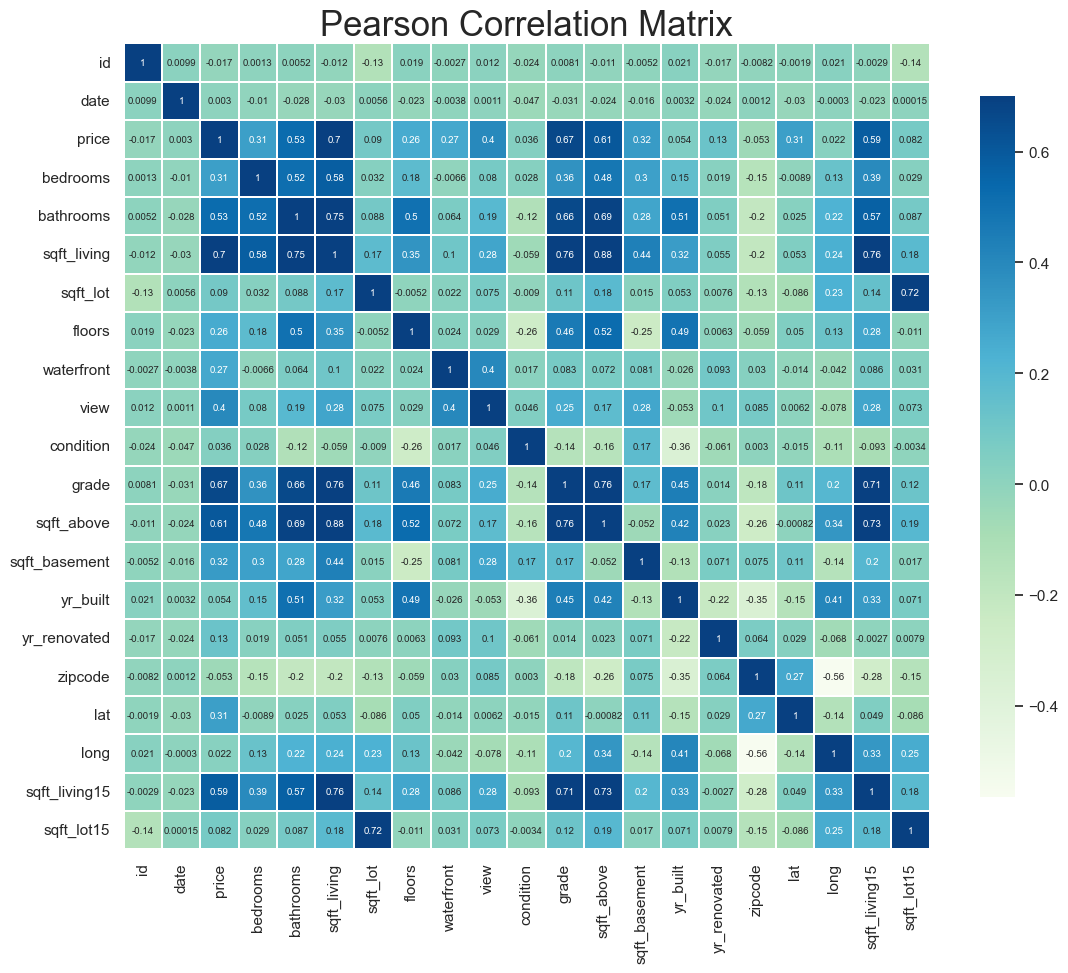

In [9]:
sns.set_theme(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})
plt.show()

### Корреляция с ценой
* Это позволяет нам исследовать признаки, которые имеют высокую корреляцию с ценой.
* Площадь жилья (sqft_living) выглядит как признак, сильно коррелирующий с ценой, а также grade, sqft_above, sqft_living15 и количество ванных комнат.

***Какие признаки имеют более высокую корреляцию с ценой?***

In [10]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### Признак цены
* Большинство цен на дома находятся в диапазоне от 0 до 1,500,000 долларов.
* Средняя цена дома составляет 540,000 долларов.
* Имейте в виду, что может быть разумной идеей исключить крайние значения. Например, мы могли бы сосредоточиться на домах с ценой от 0 до 3,000,000 долларов и исключить остальные.
* Похоже, что существует положительная линейная зависимость между ценой и площадью жилья (sqft_living).
* Увеличение жилой площади, как правило, соответствует увеличению цены дома.

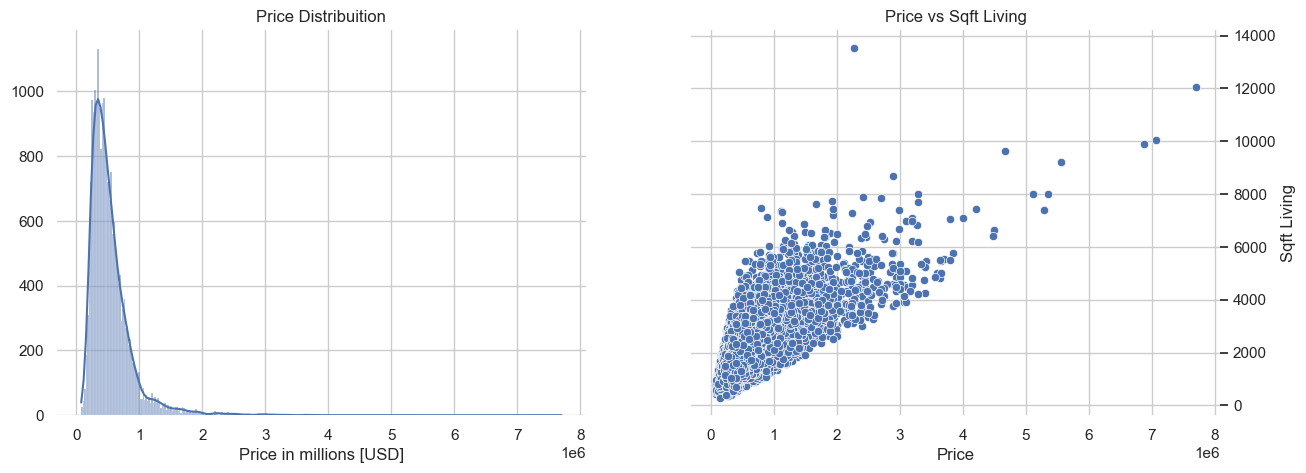

In [11]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.histplot(df['price'], ax=axes[0], kde=True)
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
plt.show()

### Боковые диаграммы для количества спален и этажей
Боковая диаграмма — это метод графического отображения групп числовых данных через их квартильные значения. Боковые диаграммы могут также иметь линии, выходящие за пределы коробок (усики), указывающие на изменчивость за пределами верхнего и нижнего квартилей, отсюда и термин "боковая диаграмма с усиками". Выбросы могут быть отображены как отдельные точки. Расстояния между различными частями коробки указывают на степень разброса (распределения).

* Мы можем видеть выбросы, отображённые как отдельные точки; вероятно, это более дорогие дома.
* Мы можем наблюдать, что цена, как правило, увеличивается с увеличением количества спален в доме.

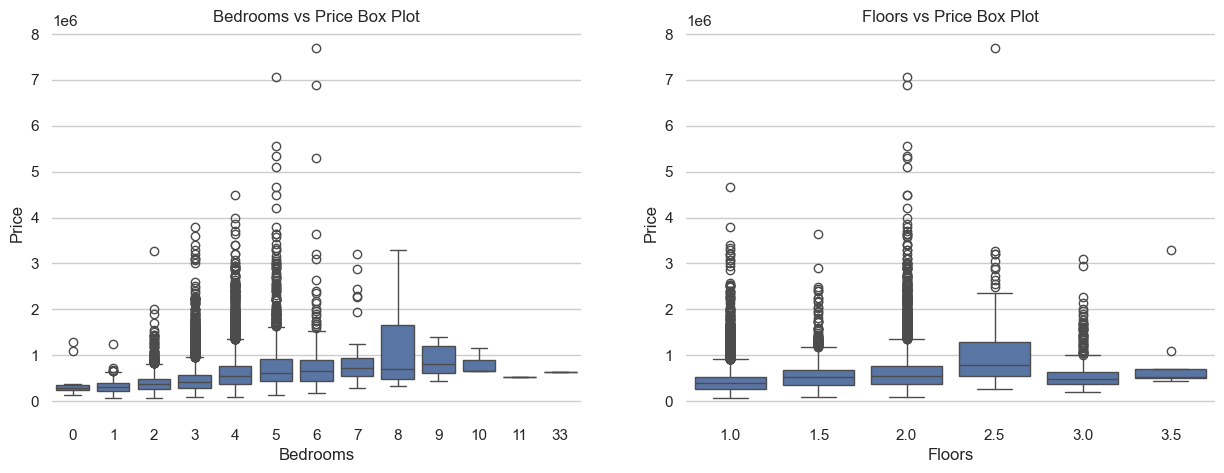

In [12]:
sns.set_theme(style="whitegrid", font_scale=1)

f,axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')
plt.show()


### Боковые диаграммы для объектов у воды, вида и оценки
* Дома у воды, как правило, имеют более высокую ценность.
* Цена домов у воды, как правило, более разнообразна, тогда как цена домов без вида на воду, наоборот, более сконцентрирована.
* Оценка (grade) и наличие вида на воду (waterfront) влияют на цену. Вид (view) кажется менее значимым, но также оказывает влияние на цену.

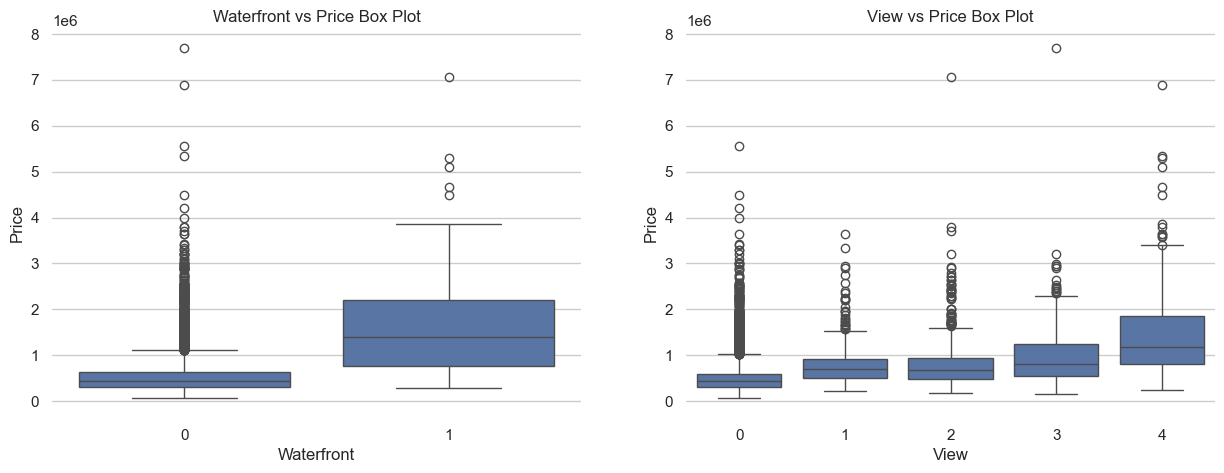

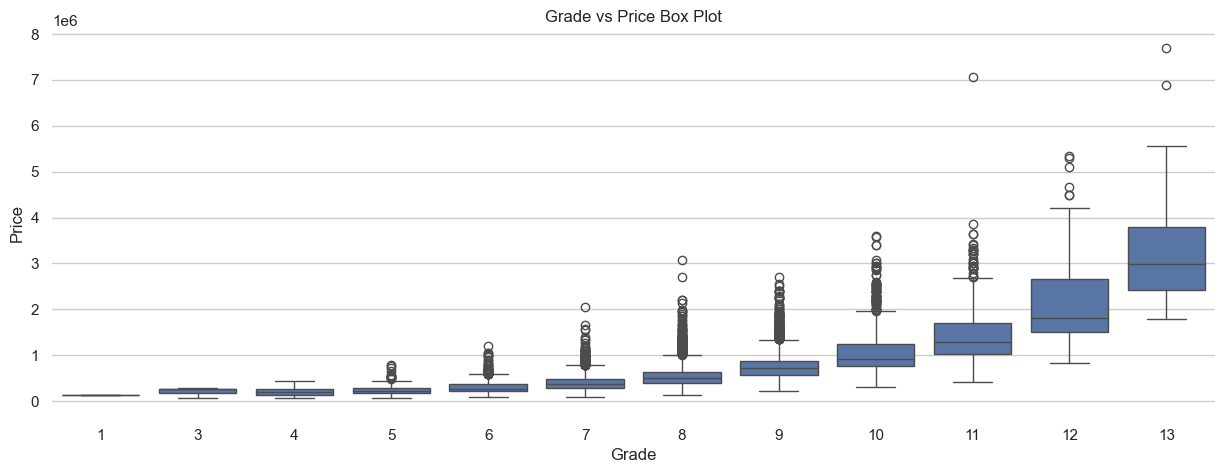

In [13]:
f,axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f,axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')
plt.show()


<a id="ch4"></a>
## Работа с данными признаков
<hr/>

### Коррекция путём исключения признаков
Исключая признаки, мы работаем с меньшим объёмом данных. Это ускоряет работу нашей тетради и упрощает анализ. Исходя из наших предположений и решений, мы хотим исключить признаки Id, zipcode и Date.

In [14]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

<a id="ch5"></a>
## Инженерия признаков
<hr/>

Мы хотим преобразовать признак даты, создав столбцы для года и месяца. Признак даты представлен в виде строки. С помощью `pd.to_datetime` мы можем преобразовать аргумент в формат datetime.

In [15]:
# Приводим все значения к строковому типу (если это еще не сделано)
df['date'] = df['date'].astype(str)

# Заменяем 'T' на пробел, чтобы правильно обработать дату и время
df['date'] = df['date'].str.replace('T', ' ')

# Преобразуем строку в формат datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')

# Извлекаем месяц и год
df['month'] = df['date'].apply(lambda date: date.month if pd.notnull(date) else None)
df['year'] = df['date'].apply(lambda date: date.year if pd.notnull(date) else None)

df = df.drop('date', axis=1)

# Проверка новых столбцов
print(df.columns.values)


['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


### Тенденции цен на дома
* Смотрев на боковые диаграммы, мы замечаем, что разница между 2014 и 2015 годами незначительная.
* Количество проданных домов по месяцам, как правило, остается примерно одинаковым каждый месяц.
* Линейный график показывает, что около апреля происходит увеличение цен на дома.

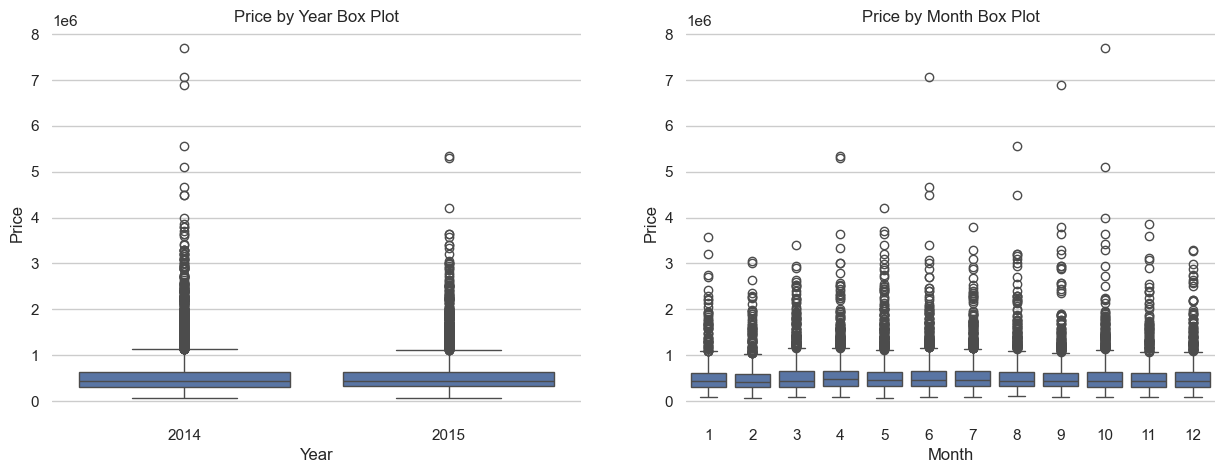

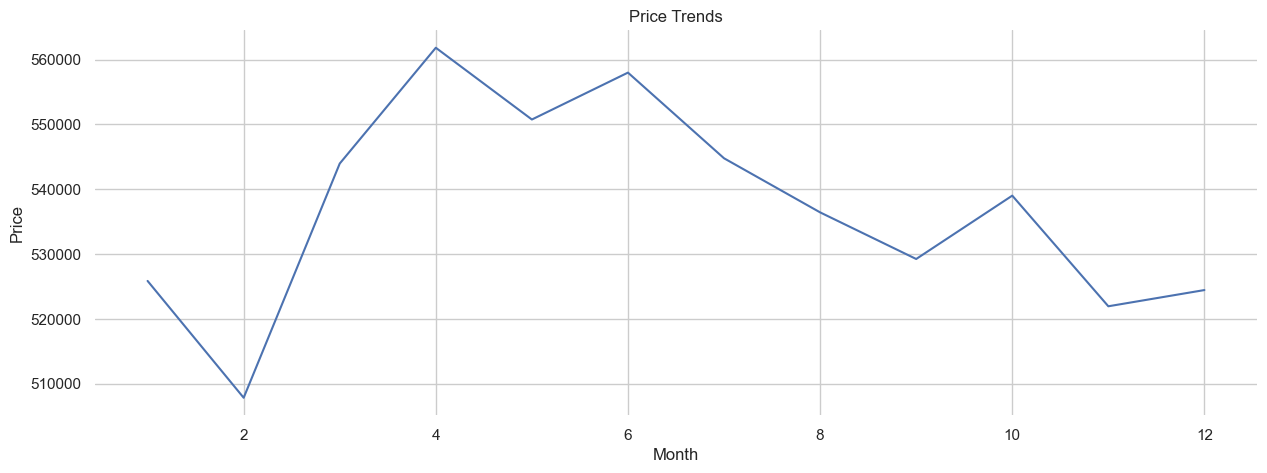

In [16]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')
plt.show()


<a id="ch6"></a>
## Масштабирование и разделение на обучающую и тестовую выборки
<hr/>
Теперь мы готовы обучить модель и предсказать необходимое решение. Существует более 60 алгоритмов предсказательного моделирования на выбор. Мы должны понять тип проблемы и требования к решению, чтобы сузить выбор до нескольких моделей, которые мы можем оценить. Наша проблема представляет собой регрессионную задачу с минимизацией среднеквадратичной ошибки. Мы также выполняем категорию машинного обучения, называемую контролируемым обучением, так как мы обучаем нашу модель на основе данного набора данных.

In [17]:
# Признаки
X = df.drop('price', axis=1)

# Метка
y = df['price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Нормализация / Масштабирование данных
Мы масштабируем данные признаков. Чтобы предотвратить утечку данных из тестового набора, мы подгоняем наш скейлер только к обучающему набору.

In [19]:
scaler = MinMaxScaler()

# Подгонка и преобразование
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Все данные были масштабированы в диапазоне от 0 до 1
print('MAX: ', X_train.max())
print('MIN: ', X_train.min())


MAX:  1.0000000000000002
MIN:  0.0


<a id="ch7"></a>
## Создание модели
***
Мы оцениваем количество нейронов (единиц) на основе наших признаков. Например: X_train.shape (15117, 19). Оптимизатор спрашивает, как вы хотите выполнить этот градиентный спуск. В данном случае мы используем оптимизатор Adam и функцию потерь среднеквадратичной ошибки.

In [20]:
model = Sequential()

# Входной слой
model.add(Dense(19, activation='relu'))

# Скрытые слои
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# Выходной слой
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


<a id="ch8"></a>
## Обучение модели
***
Теперь, когда модель готова, мы можем подогнать модель под данные.

Поскольку набор данных большой, мы будем использовать параметр `batch_size`. Обычно используют размеры пакетов, равные степени двойки (32, 64, 128, 256...). В данном случае мы используем 128. Чем меньше размер пакета, тем больше времени потребуется для обучения.

In [21]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 426612162560.0000 - val_loss: 432959193088.0000
Epoch 2/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 425579839488.0000 - val_loss: 427437260800.0000
Epoch 3/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 416970342400.0000 - val_loss: 377626558464.0000
Epoch 4/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 338863849472.0000 - val_loss: 222660296704.0000
Epoch 5/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177806065664.0000 - val_loss: 109789741056.0000
Epoch 6/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98555740160.0000 - val_loss: 103145144320.0000
Epoch 7/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94535639040.0000 - val_loss: 101369503744.0000
Epoch 8/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92154093568.0000 - val_loss: 99664592896.0000
Epoch 9/400
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88575303680.0000 - val_loss: 97815437312.0000
Epoch 10/400
119/119 ━━━━

### Потери при обучении по эпохам
* Этот график показывает потери при обучении по эпохам.
* Этот график помогает нам определить, есть ли переобучение в модели. В данном случае переобучения нет, поскольку обе линии снижаются одновременно.

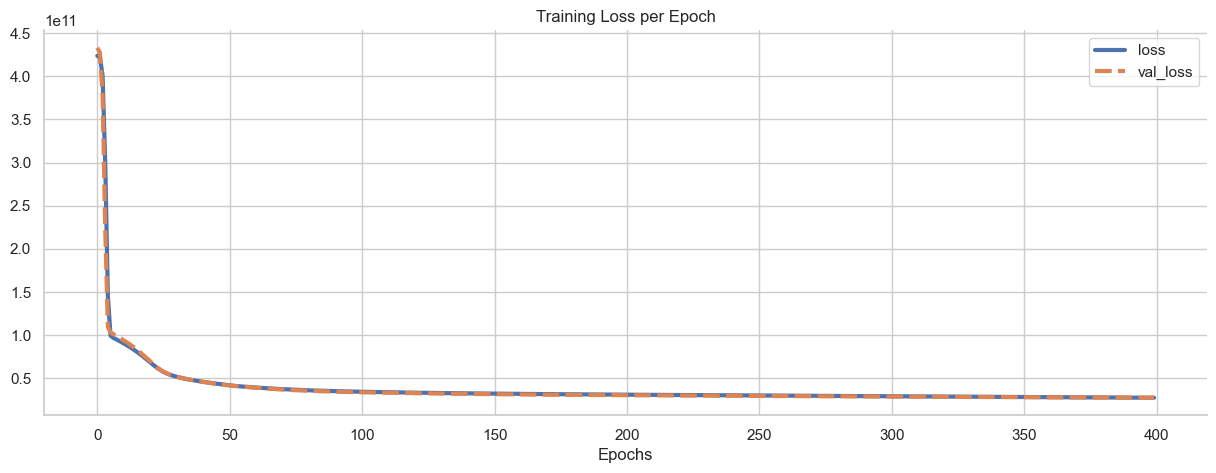

In [22]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()
plt.show()

<a id="ch9"></a>
## Оценка на тестовых данных
---
### Метрики оценки регрессии

**Средняя абсолютная ошибка** (MAE) — это среднее абсолютное значение ошибок:

$$\frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$

**Средняя квадратичная ошибка** (MSE) — это среднее значение квадратов ошибок:

$$\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

**Корень средней квадратичной ошибки** (RMSE) — это квадратный корень из среднего значения квадратов ошибок:

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$$

Сравнение этих метрик:

- **MAE** проще всего понять, так как это средняя ошибка.
- **MSE** более популярна, чем MAE, потому что MSE "наказывает" большие ошибки, что обычно полезно в реальном мире.
- **RMSE** еще более популярна, чем MSE, потому что RMSE интерпретируется в единицах "y".

### Прогнозирование на совершенно новых данных
В этой части мы предоставляем модели тестовый набор, чтобы получить список прогнозов. Затем мы сравниваем правильные значения со списком прогнозов. Мы используем различные метрики для сравнения прогнозов; в данном случае мы используем MAE, MSE, RMSE и коэффициент регрессионной дисперсии.

Давайте начнем с анализа MAE, которая составляет \$103,500. Это означает, что наша модель в среднем ошибается примерно на \$100,000.

***Является ли этот MAE хорошим или плохим?***

Для этого мы должны учитывать наш исходный набор данных и посмотреть, какие значения у нас есть. Например, среднее значение составляет 540,000, следовательно, MAE составляет около 19% от средней цены. Это не особенно хороший результат.

Чтобы лучше понять эту ошибку, мы можем использовать коэффициент регрессионной дисперсии, где наилучший возможный результат равен 1.0, а более низкие значения считаются худшими. Это показывает, насколько хорошо ваша модель объясняет дисперсию. В нашем случае у нас 0.80, что является нормальным результатом.

In [23]:
# Прогнозы на тестовом наборе
predictions = model.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())


203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAE:  103051.69771986814
MSE:  27698178224.309513
RMSE:  166427.69668630735
Variance Regression Score:  0.8026897493208888


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


### Прогнозы модели против идеального соответствия
* Мы можем сравнить прогнозы модели с идеальным соответствием, чтобы увидеть, насколько точно модель работает.
* Красная линия представляет идеальное предсказание.
* Мы страдаем из-за выбросов, которые представляют собой дорогие дома. Наша модель не очень хорошо предсказывает цены на люксовые дома.
* С другой стороны, наша модель хорошо предсказывает цену домов в диапазоне от \$0 до \$2 миллионов. Здесь явно хорошее соответствие.
* Возможно, имеет смысл переобучить нашу модель только на домах с ценой ниже \$3 миллионов.

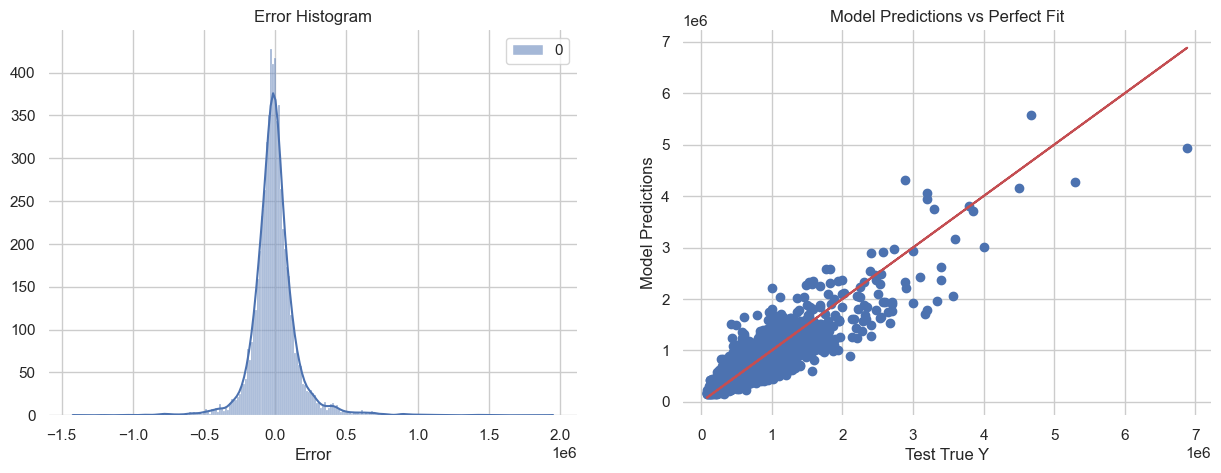

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(15, 5))

# Прогнозы нашей модели
plt.scatter(y_test, predictions)

# Идеальные прогнозы
plt.plot(y_test, y_test, 'r')

# Вычисляем ошибки
errors = y_test.values.reshape(-1, 1) - predictions

# Используем histplot вместо distplot
sns.histplot(errors, ax=axes[0], kde=True)  # 'kde=True' добавит линию оценки плотности

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

plt.show()


<a id="ch10"></a>
## Прогнозирование цены нового дома

Мы собираемся использовать модель для прогнозирования цены нового дома. Мы выберем первый дом из набора данных и уберем цену. `single_house` будет содержать все необходимые нам характеристики для предсказания цены. После этого нам нужно изменить форму переменной и нормализовать характеристики.

Исходная цена составляет 221,900 тысячу долларов, а прогноз модели составляет 280,000 тысяч долларов.

In [25]:
# Характеристики нового дома
single_house = df.loc[0].drop('price')  # Извлекаем первую строку без цены, сохраняя имена признаков
print(f'Features of new house:\n{single_house}')

# Изменяем форму массива numpy и нормализуем характеристики
single_house = scaler.transform(single_house.values.reshape(1, -1))  # Изменяем форму на (1, n_features)

# Запускаем модель и получаем прогноз цены
predicted_price = model.predict(single_house)[0, 0]
print('\nPrediction Price: ${:,.2f}'.format(predicted_price))

# Исходная цена
original_price = df.iloc[0]['price']
print('\nOriginal Price: ${:,.2f}'.format(original_price))


Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

Prediction Price: $286,910.59

Original Price: $221,900.00


C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
